## Exploratory Data Analysis : NYC Rat Sightings

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
from pywaffle import Waffle

%matplotlib inline

In [38]:
df = pd.read_csv("../dataset/rat_sightings.csv", encoding = "utf-8", sep='\t')

In [39]:
df.head(5)

,Address Type,Agency Name,Agency,Borough,City,Closed Date,Community Board,Complaint Type,Created Date,Cross Street 1,...,Landmark,Latitude,Location Type,Longitude,Park Borough,Park Facility Name,Resolution Action Updated Date,Status,Street Name,Unique Key
0,ADDRESS,Department of Health and Mental Hygiene,DOHMH,QUEENS,Jamaica,09/11/2013 0:00,12 QUEENS,Rodent,09/05/2013 0:00,134 AVENUE,...,NaN,40.670256,Other (Explain Below),-73.782029,QUEENS,Unspecified,11/09/2013 0:00,Closed,154 STREET,26263809
1,NaN,Department of Health and Mental Hygiene,DOHMH,MANHATTAN,NaN,20/09/2013 21:55,Unspecified MANHATTAN,Rodent,09/05/2013 0:00,170 160,...,NaN,NaN,Other (Explain Below),NaN,MANHATTAN,Unspecified,09/20/2013 09:55:49 PM,Closed,NaN,26263848
2,ADDRESS,Department of Health and Mental Hygiene,DOHMH,MANHATTAN,NEW YORK,30/08/2013 0:00,10 MANHATTAN,Rodent,09/05/2013 0:00,WEST 113 STREET,...,NaN,40.802798,3+ Family Apt. Building,-73.956540,MANHATTAN,Unspecified,05/09/2013 16:39,Pending,8 AVENUE,26264065
3,ADDRESS,Department of Health and Mental Hygiene,DOHMH,QUEENS,Bellerose,09/05/2013 0:00,13 QUEENS,Rodent,09/05/2013 0:00,81 AVENUE,...,NaN,40.739742,Other (Explain Below),-73.722953,QUEENS,Unspecified,05/09/2013 13:39,Closed,246 STREET,26264334
4,ADDRESS,Department of Health and Mental Hygiene,DOHMH,BROOKLYN,BROOKLYN,09/09/2013 0:00,04 BROOKLYN,Rodent,09/05/2013 0:00,CENTRAL AVENUE,...,NaN,40.692298,3+ Family Apt. Building,-73.913437,BROOKLYN,Unspecified,09/09/2013 0:00,Closed,CORNELIA STREET,26264441


### dataset summary

In [62]:
df.describe()

,Facility Type,Incident Zip,Latitude,Longitude,Unique Key
count,0.0,114129.000000,113713.000000,113713.000000,1.145070e+05
mean,NaN,10733.369231,40.738973,-73.934195,2.928636e+07
std,NaN,623.578914,0.081989,0.070172,6.523692e+06
min,NaN,83.000000,40.499502,-74.254437,1.146439e+07
25%,NaN,10128.000000,40.679485,-73.966225,2.392620e+07
50%,NaN,10472.000000,40.724496,-73.938428,3.028497e+07
75%,NaN,11222.000000,40.814804,-73.899876,3.477013e+07
max,NaN,100354.000000,40.912869,-73.701632,3.955749e+07


## Data Types

In [41]:
df.dtypes

Address Type                       object
Agency Name                        object
Agency                             object
Borough                            object
City                               object
Closed Date                        object
Community Board                    object
Complaint Type                     object
Created Date                       object
Cross Street 1                     object
Cross Street 2                     object
Descriptor                         object
Due Date                           object
Facility Type                     float64
Incident Address                   object
Incident Zip                      float64
Intersection Street 1              object
Intersection Street 2              object
Landmark                           object
Latitude                          float64
Location Type                      object
Longitude                         float64
Park Borough                       object
Park Facility Name                

## Frequency Distribution by City

In [42]:
df['City'].value_counts()

BROOKLYN            39355
NEW YORK            29680
BRONX               23062
STATEN ISLAND        5398
Jamaica              1440
JAMAICA              1018
Ridgewood             952
RIDGEWOOD             810
Astoria               719
Woodside              540
Flushing              445
ASTORIA               440
WOODSIDE              394
Corona                353
Elmhurst              347
Long Island City      344
Ozone Park            340
Jackson Heights       329
Saint Albans          312
LONG ISLAND CITY      294
FLUSHING              259
Maspeth               248
Middle Village        234
ELMHURST              232
CORONA                227
Rego Park             223
Queens Village        223
SAINT ALBANS          219
MASPETH               216
East Elmhurst         213
                    ...  
CAMBRIA HEIGHTS        47
Little Neck            45
OAKLAND GARDENS        42
COLLEGE POINT          38
ARVERNE                33
Floral Park            27
Oakland Gardens        25
ROCKAWAY PAR

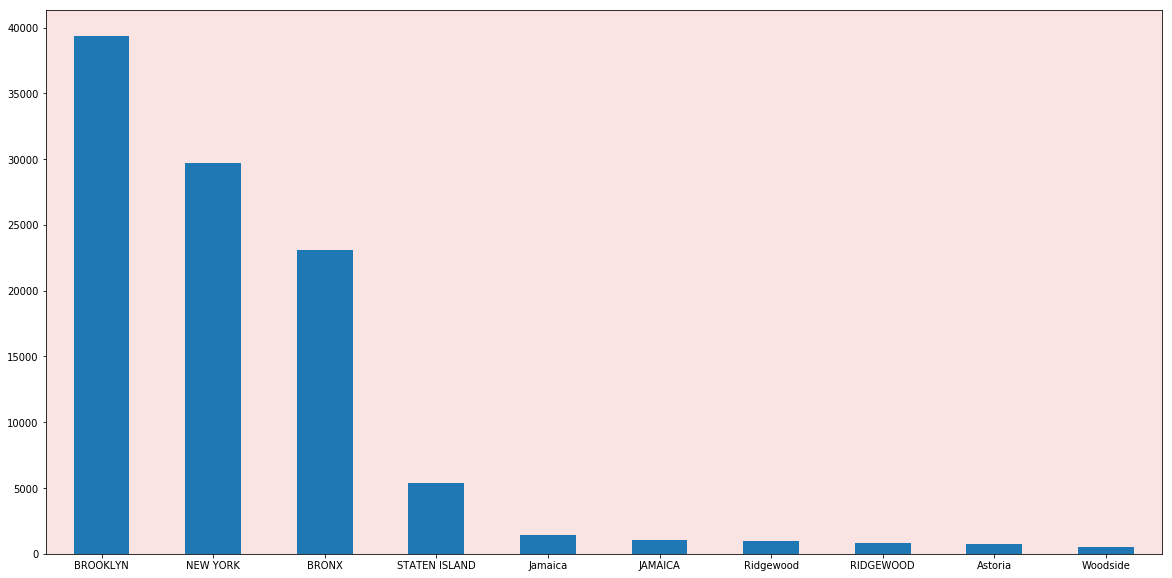

In [43]:
df['City'].value_counts()[:10].plot.bar(rot=0,figsize=(20,10))

In [44]:
df.Borough.value_counts()

BROOKLYN         39487
MANHATTAN        29837
BRONX            23109
QUEENS           16645
STATEN ISLAND     5425
Unspecified          4
Name: Borough, dtype: int64

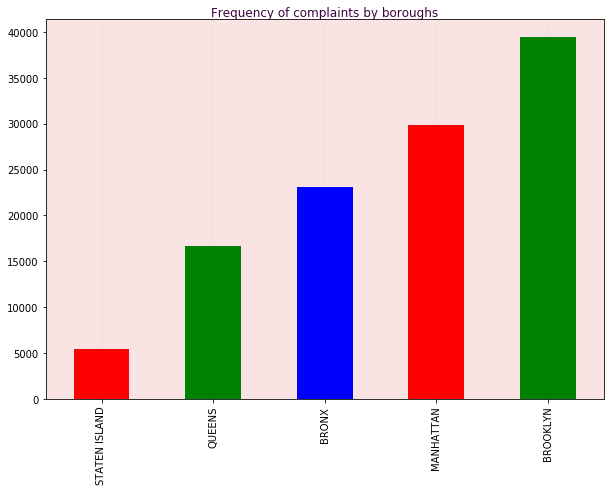

In [45]:
colors = ['red','green','blue']

ax = df.Borough.value_counts().sort_values(ascending=True).tail(5).plot(kind='bar', color=colors, figsize=(10,7))

ax.set_title('Frequency of complaints by boroughs', pad=2)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.grid(True, axis='x', linestyle=':', linewidth=0.3)

ax.set_axisbelow(True)



In [58]:
borough_pop = pd.DataFrame({
    'borough': ['Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'],
    'number_of_complaints': [30261/1665000*10000, 23356/1471000*10000, 40114/2649000*10000, 5511/479458*10000, 16899/2359000*10000]
})
borough_pop

,borough,number_of_complaints
0,Manhattan,181.747748
1,Bronx,158.776343
2,Brooklyn,151.430729
3,Staten Island,114.942289
4,Queens,71.636287


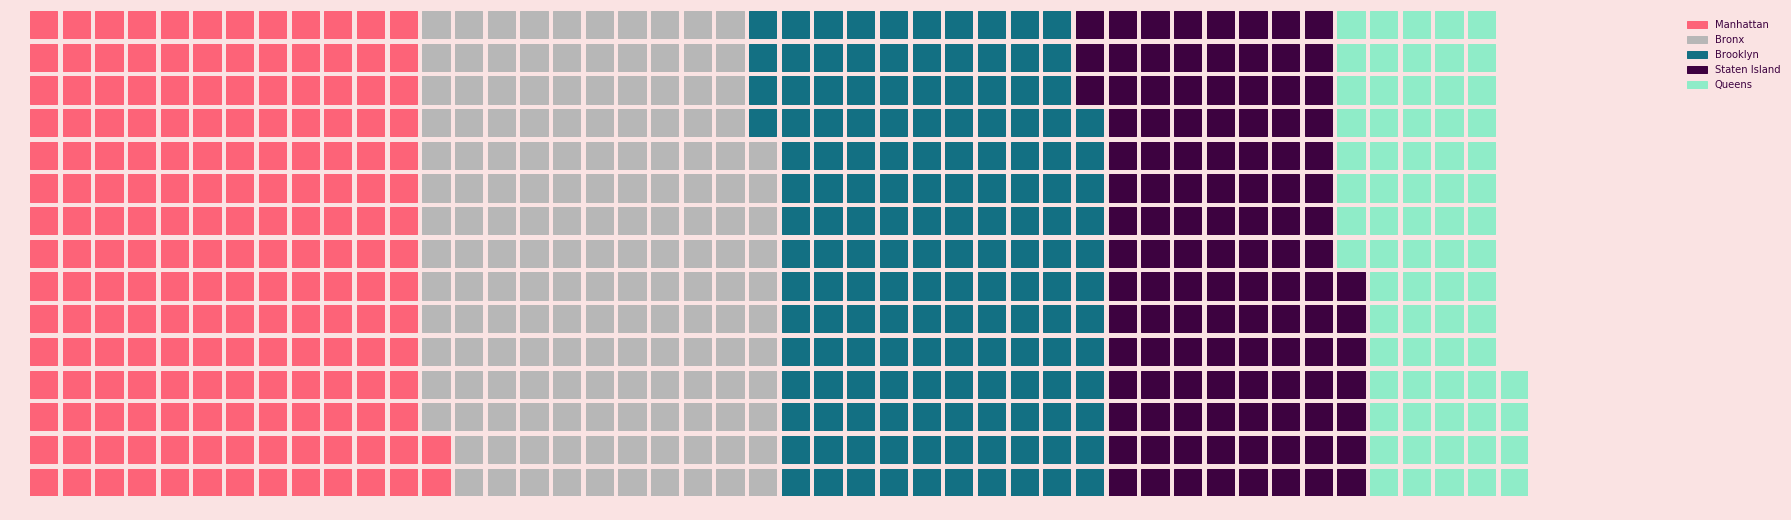

In [60]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15,
    values=borough_pop.number_of_complaints,
    labels=list(borough_pop.borough),
    figsize=(25, 25),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", '#8fecc8'),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#fad3e3')
fig.set_facecolor('#fae3e3')


### Community Board frequency?

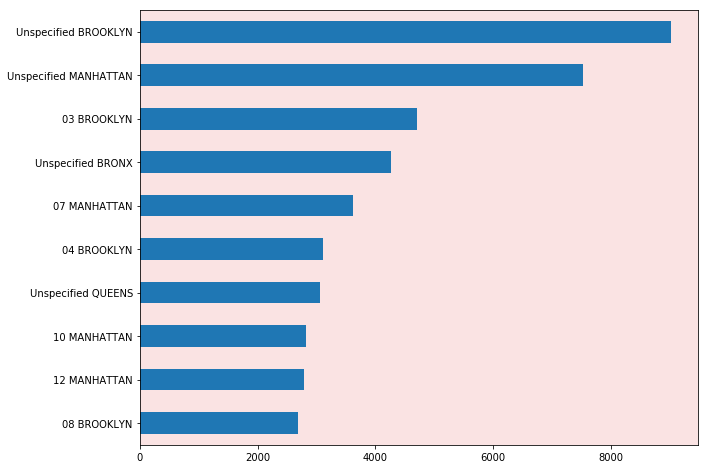

In [48]:
df['Community Board'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

### What streets have the most rat sightings?

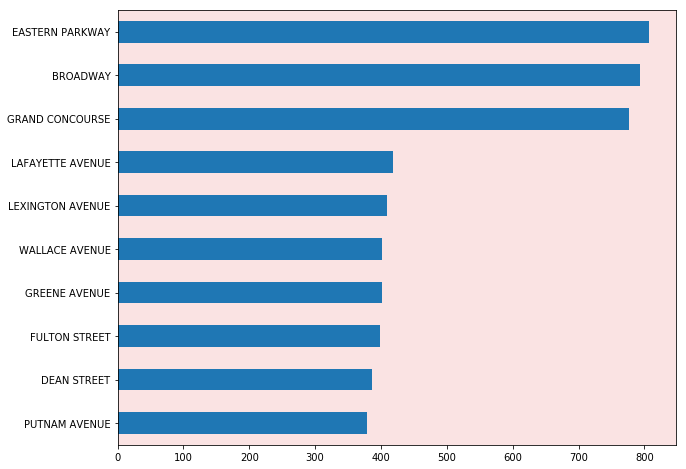

In [49]:
df['Street Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))